In [2]:
# Using the tweepy handler to collect the tweets

# Retrieving the consumer key, consumer secret, access token and access secret from the tokens.py File
import Tokens

import tweepy
from tweepy import OAuthHandler
import pandas as pd
import sys
encodingTot = sys.stdout.encoding or 'utf-8'
 
consumer_key = Tokens.consumer_key
consumer_secret = Tokens.consumer_secret
 
access_token = Tokens.access_token
access_secret = Tokens.access_secret
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [3]:
# testing authentication

try:
    api.verify_credentials()
    print("Authentication Successful")
except:
    print("Error during authentication")

Authentication Successful


In [57]:
import datetime
search_terms = ['Vote Cindy', 'Vote Esther', 'Vote Frodd', 'Vote Sir Dee', 'Vote Tacha', 'Vote Venita']

columns = ['id','name', 'tweet', 'retweets_count','location','created','followers_count','geo','hashtags','verified','retweeted']
todays_date = datetime.datetime.now().date()
 
tweetDF = pd.DataFrame(columns=columns)
 
num_tweets = 50

for tweet in tweepy.Cursor(api.search_full_archive,environment_name = "prod", query="elections lang:en",fromDate="202003012315",toDate="202011082315",maxResults="100").items(num_tweets):


    lenDF = len(tweetDF)
 
    tweetDF.loc[lenDF] = [tweet.user.id,tweet.user.screen_name, tweet.text, tweet.retweet_count, tweet.user.location,tweet.created_at.strftime("%d-%b-%Y"),tweet.user.followers_count,tweet.geo,tweet.entities["hashtags"],tweet.user.verified,tweet.retweeted]
         
#tweetDF.to_csv("sampleDF.csv", sep='\t', encoding = encodingTot)
tweetDF.to_csv("2021Tweets.csv",mode='a', sep='\t', encoding = encodingTot,header=False)
 
tweetDF = pd.read_csv(open('2021Tweets.csv','rU'), sep='\t', engine='c')
 
tweetDF.head()

,Unnamed: 0,id,name,tweet,retweets_count,location,created,followers_count,geo,hashtags,verified,retweeted
0,0,3084619833,KumasMommy,RT @IndivisibleVent: 🚨HAPPENING NOW!\n\nRepubl...,0,Midwest,20-May-2020,175,NaN,"[{'text': 'COVID', 'indices': [127, 133]}]",False,False
1,1,1209650152094490636,BrynCleat,@barrytobebarry Water Cannon✅\nBlue Indelible ...,0,United Celtic Nations,20-May-2020,1691,NaN,[],False,False
2,2,22076866,lkofman,Cisco is a proud sponsor of The Match: Champio...,0,"San Jose, CA",20-May-2020,268,NaN,[],False,False
3,3,1166810239355801607,avelonia1,Michigan Rep. Karen Whitsett credits #hydroxyc...,0,NaN,20-May-2020,234,NaN,"[{'text': 'hydroxychloroquine', 'indices': [37...",False,False
4,4,109051409,ChrisRBrock,I find it hilarious that everyone doing Skype ...,0,"Columbus, OH",20-May-2020,842,NaN,[],False,False


In [62]:
import pandas as pd
import numpy as np
import string
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

def preprocessing(df):
    stemmer=PorterStemmer()
    lmtzr = WordNetLemmatizer()
    
    # putting the tweets into a list
    tweet_list = df['tweet'].tolist()
    
    regex_str = [
     # HTML tags
    r'<[^>]+>', 
    # @-signs
    r'(?:@[\w_]+)',
    # hash-tags
    # r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", 
    # URLs 
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 
    # numbers
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', 
    # words with - and '
    r"(?:[a-z][a-z'\-_]+[a-z])",
    # other words
    # r'(?:[\w_]+)'
    ]
    
    numbers = r'(?:(?:\d+,?)+(?:\.?\d+)?)'
    URL = r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+'
    html_tag = r'<[^>]+>'    
    at_sign = r'(?:@[\w_]+)'
    dash_quote = r"(?:[a-z][a-z'\-_]+[a-z])"
    other_word = r'(?:[\w_]+)'
    # Words containing numbers
    cont_number = r'(\w*\d\w*)'
     
    # REGEX remove all words with \ and / combinations

    slash_back =  r'\s*(?:[\w_]*\\(?:[\w_]*\\)*[\w_]*)'
    slash_fwd = r'\s*(?:[\w_]*/(?:[\w_]*/)*[\w_]*)'
    slash_all = r'\s*(?:[\w_]*[/\\](?:[\w_]*[/\\])*[\w_]*)'
   
    list_regex = r'(' + '|'.join(regex_str) + ')'
   
    def filterPick(list, filter):
        return [ ( l, m.group(1) ) for l in list for m in (filter(l),) if m]
 
    search_regex = re.compile(list_regex, re.VERBOSE | re.IGNORECASE).search
   
    outlist = filterPick(tweet_list, search_regex)
    
    #Regex functions
    emoticons_list = [':)', ';)', '(:', '(;', '}', '{','}']
    # characters to be removed
    char_remove = [']', '[', '(', ')', '{', '}']
    filler_words = ['here', 'there', 'where', 'when', 'would', 'should', 'could','thats', 'youre','thanks', 'hasn','thank', 'https', 'since', 'wanna', 'gonna', 'aint', 'http', 'unto', 'onto', 'into', 'havent','dont', 'done', 'cant', 'werent', 'https', 'u', 'isnt', 'go', 'theyre', 'each', 'every', 'shes', 'youve', 'youll','weve', 'theyve']
   
    repl_dict = {'googleele': 'goog', 'lyin': 'lie', 'googles': 'goog', 'aapl':'apple','msft':'microsoft', 'google': 'goog', 'googl':'goog'}
   
    exclude = list(string.punctuation) + emoticons_list + filler_words
   
    tweet_clean_fin = [] # Cleaned Tweets
    
    for tweet in outlist:

        tw_clean = []
        tw_clean = [ch for ch in tweet if ch not in char_remove]
        tw_clean = re.sub(URL, "", str(tw_clean))
        tw_clean = re.sub(html_tag, "",str(tw_clean))
        tw_clean = re.sub(slash_all,"", str(tw_clean))
        tw_clean = re.sub(cont_number, "",str(tw_clean))
        tw_clean = re.sub(numbers, "",str(tw_clean))
        tw_clean = re.sub(at_sign, "",str(tw_clean))
        tw_clean = re.sub("'", "",str(tw_clean))
        tw_clean = re.sub('"', "",str(tw_clean))
        tw_clean = re.sub('#', "",str(tw_clean))
        tw_clean = re.sub('@', "",str(tw_clean))
        tw_clean = re.sub("rt", "", str(tw_clean))
        tw_clean = re.sub('http', '', str(tw_clean))
        tw_clean = re.sub('https', '',str(tw_clean))

        tw_clean = lmtzr.lemmatize(str(tw_clean))
        #tw_clean = stemmer.stem(str(tw_clean))

        tw_clean_lst = re.findall(r'\w+', str(tw_clean))

        tw_clean_lst = [tw.lower() for tw in tw_clean_lst if tw.lower() not in stopwords.words('english')]
        tw_clean_lst = [word for word in tw_clean_lst if word not in exclude]
        tw_clean_lst = str([word for word in tw_clean_lst if len(word)>3])

        tw_clean_lst = re.findall(r'\w+', str(tw_clean_lst))
        tw_clean_lst = [replace_all(word, repl_dict) for word in tw_clean_lst]

        tweet_clean_fin.append(list(tw_clean_lst))
       
    tweet_clean_fin= [' '.join(item) for item in tweet_clean_fin]
    df['tweet']=tweet_clean_fin
       
    '''
    Return dataframe here
    '''
    return df
    


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/priyanka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
precovid_df= pd.read_csv(open('2019Tweets Jan - May 550.csv','rU',encoding='utf-8'), sep='\t', engine='c')
covid_timeline= pd.read_csv(open('2020Tweets Random - 200.csv','rU',encoding='utf-8'), sep='\t', engine='c')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


In [64]:
def cleaned_hashtags(x):
    y = x.split(',')
    tags = []
    for tag in y:
        if tag.find('text') != -1:
            tags.append(tag.split(':')[-1].strip(' ').strip('\''))
    return ' '.join(tags) 

In [65]:
precovid_df['hashtags'] = precovid_df['hashtags'].apply(lambda x : cleaned_hashtags(x))
covid_timeline['hashtags'] = covid_timeline['hashtags'].apply(lambda x : cleaned_hashtags(x))

In [66]:
precovid_df.head(20)

,Unnamed: 0,id,name,tweet,retweets_count,location,created,followers_count,geo,hashtags,verified,retweeted
0,0,15795274,tkripas,Don't bother inviting me to catch up over coff...,0,Chicagoland,29-Jan-2019,1046,NaN,,False,False
1,1,3368318501,MrJLSimpson,RT @CNHSBullDogs: CNHS 8th Grade Parent - Stud...,0,"Indiana, USA",29-Jan-2019,206,NaN,,False,False
2,2,576491140,MaryGetzHouses,Have You Noticed? The Housing Market Is Starti...,0,Southwest IN,29-Jan-2019,245,NaN,,False,False
3,3,3254024678,NVRgonloseGucci,2019 starting real different,0,"Spanish Town🇯🇲Queens NY, ATL",29-Jan-2019,248,NaN,,False,False
4,4,937682714,BGoodAngus,"RT @cdnangus: Starting Feb 2019, the Temple Ta...",0,NaN,29-Jan-2019,1358,NaN,,False,False
5,5,628044605,OdarioWilliams,RT @MissAngelineTW: The 2019 @TheJUNOAwards No...,0,"Toronto, Ontario",29-Jan-2019,3477,NaN,,False,False
6,6,28146552,Garry_Terry,RT @FaithandFreedom: We appreciate Pres. @real...,0,rural NC farming community,29-Jan-2019,78,NaN,,False,False
7,7,718113631557124096,miladypirate1,RT @rbrosemer: #ad Ready to throw the best gam...,0,NaN,29-Jan-2019,1102,NaN,ad,False,False
8,8,248278224,peucoverde,RT @PistonPowered: The Lakers are going after ...,0,NaN,29-Jan-2019,225,NaN,,False,False
9,9,764197620,MiikaMakitalo,RT @StephChecchi: Excellent presentation by @m...,0,Finland,29-Jan-2019,1820,NaN,,False,False


In [67]:
def find_top_n_hashtags(df, n):
    tags = []
    tag_pattern = re.compile(r"#[a-zA-Z]+")
    tag_matches = list(df['tweet'].apply(tag_pattern.findall))
    tag_dict = {}
    for match in tag_matches:
        for singlematch in match:
            if singlematch not in tag_dict.keys():
                tag_dict[singlematch] = 1
            else:
                tag_dict[singlematch] = tag_dict[singlematch]+1
    
    ordered_list =sorted(tag_dict.items(), key=lambda x:x[1])
    ordered_list = ordered_list[::-1]
    #Separating the hashtags and their values into two different lists
    ordered_values = []
    ordered_keys = []
    for item in ordered_list[0:n]:
        ordered_keys.append(item[0])
        ordered_values.append(item[1])
    
    return ordered_keys, ordered_values

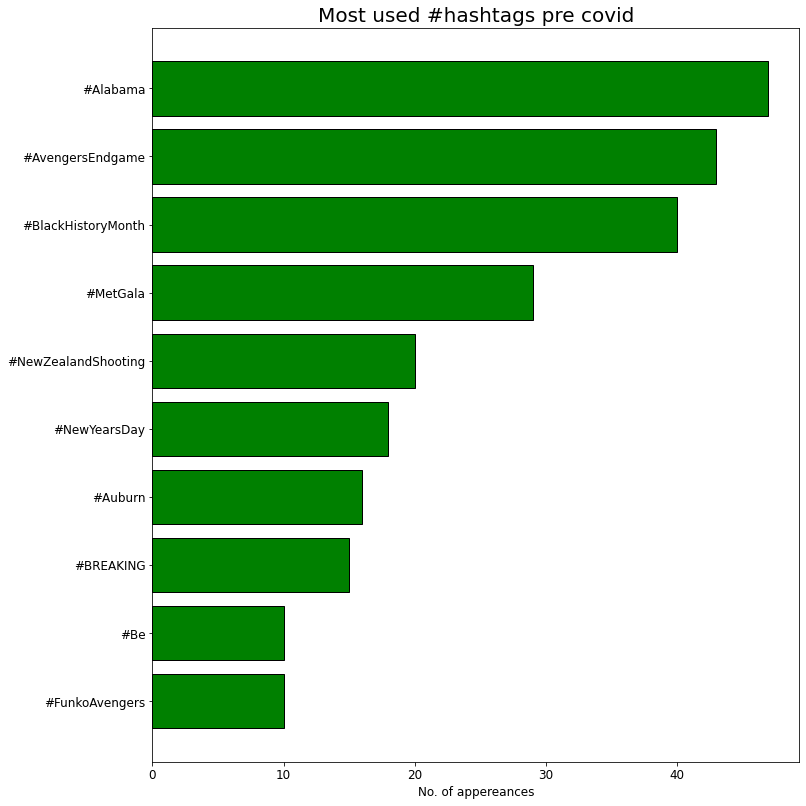

In [68]:
hashtag_ordered_keys, hashtag_ordered_values = find_top_n_hashtags(precovid_df, 10)
#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("No. of appereances")
ax.set_title("Most used #hashtags pre covid", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

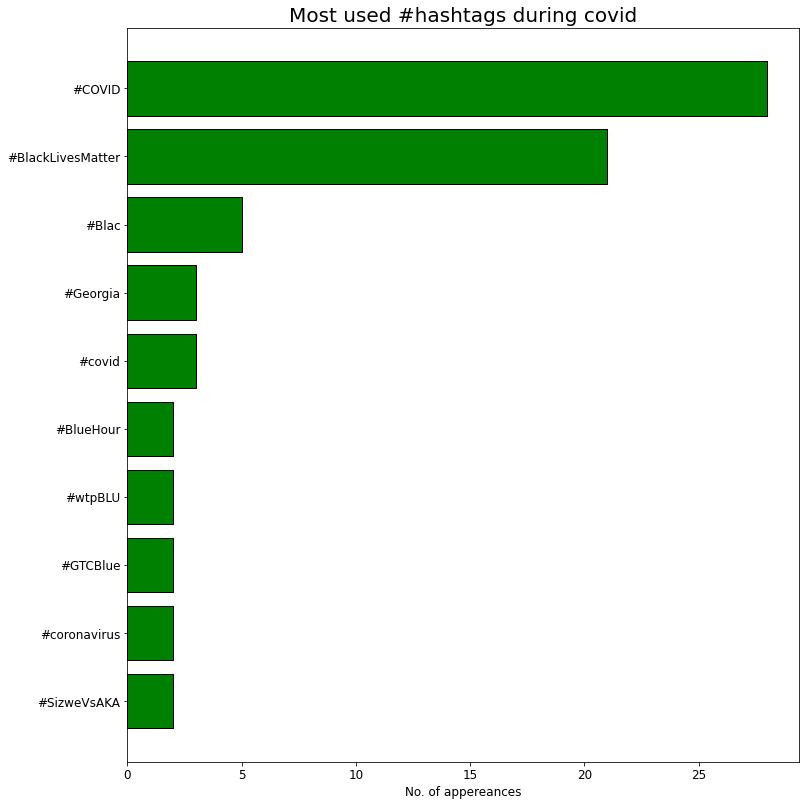

In [69]:
hashtag_ordered_keys, hashtag_ordered_values = find_top_n_hashtags(covid_timeline, 10)
#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("No. of appereances")
ax.set_title("Most used #hashtags during covid", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

In [70]:
              
def find_top_n_mentioned_accounts(df, n):
    mentions = []
    mention_pattern = re.compile(r"@[a-zA-Z_]+")
    mention_matches = list(df['tweet'].apply(mention_pattern.findall))
    mentions_dict = {}
    for match in mention_matches:
        for singlematch in match:
            if singlematch not in mentions_dict.keys():
                mentions_dict[singlematch] = 1
            else:
                mentions_dict[singlematch] = mentions_dict[singlematch]+1
                
    ordered_list = sorted(mentions_dict.items(), key=lambda x:x[1])
    ordered_list = ordered_list[::-1]

    ordered_values = []
    ordered_keys = []
    for item in ordered_list[0:n]:
        ordered_keys.append(item[0])
        ordered_values.append(item[1])
    
    return ordered_keys, ordered_values

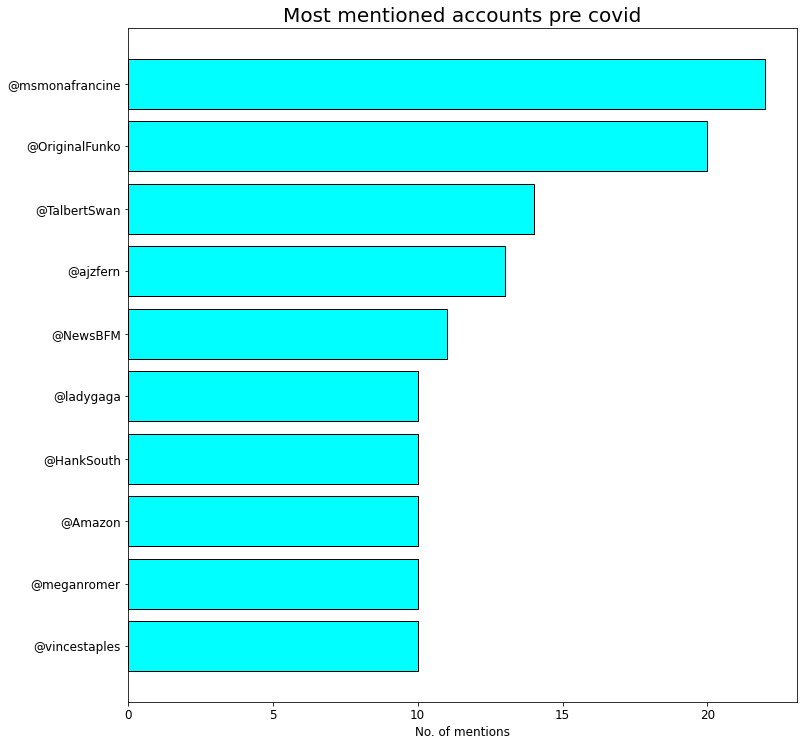

In [71]:
mentions_ordered_keys , mentions_ordered_values = find_top_n_mentioned_accounts(precovid_df, 10)
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'cyan', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("No. of mentions")
ax.set_title("Most mentioned accounts pre covid", fontsize = 20)

plt.show()

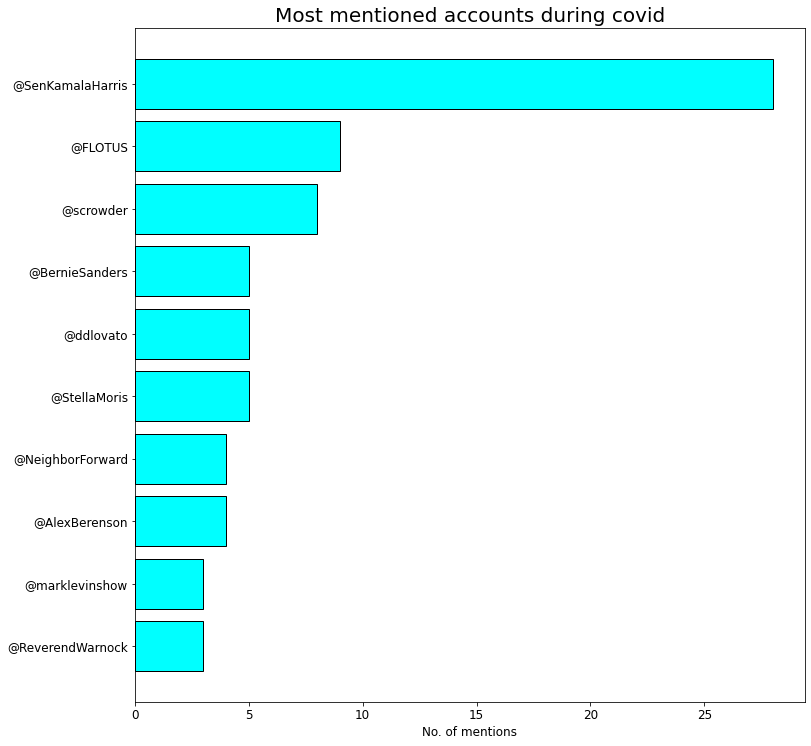

In [72]:
mentions_ordered_keys , mentions_ordered_values = find_top_n_mentioned_accounts(covid_timeline, 10)
fig, ax = plt.subplots(figsize = (12,12))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'cyan', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("No. of mentions")
ax.set_title("Most mentioned accounts during covid", fontsize = 20)

plt.show()

In [73]:
precovid_cleaned_df = preprocessing(precovid_df)
covid_timeline_cleaned_df= preprocessing(covid_timeline)


In [74]:
# Removing geo column since it is empty (nan)
del precovid_cleaned_df['geo']
del covid_timeline_cleaned_df['geo']

In [75]:
# Removing dummy column since it is empty (nan)

del precovid_cleaned_df['Unnamed: 0']
del covid_timeline_cleaned_df['Unnamed: 0']

In [76]:
precovid_cleaned_df.head()

,id,name,tweet,retweets_count,location,created,followers_count,hashtags,verified,retweeted
0,15795274,tkripas,bother inviting catch coffee networking staing...,0,Chicagoland,29-Jan-2019,1046,,False,False
1,3368318501,MrJLSimpson,cnhs grade parent student night monday staing ...,0,"Indiana, USA",29-Jan-2019,206,,False,False
2,576491140,MaryGetzHouses,noticed housing market staing look brighter,0,Southwest IN,29-Jan-2019,245,,False,False
3,3254024678,NVRgonloseGucci,staing real different,0,"Spanish Town🇯🇲Queens NY, ATL",29-Jan-2019,248,,False,False
4,937682714,BGoodAngus,staing temple comfoear canadian angus rfid ind...,0,NaN,29-Jan-2019,1358,,False,False


In [77]:
covid_timeline_cleaned_df.head()

,id,name,tweet,retweets_count,location,created,followers_count,hashtags,verified,retweeted
0,3084619833,KumasMommy,happening trying rush lifetime judicial appoin...,0,Midwest,20-May-2020,175,COVID,False,False
1,1209650152094490636,BrynCleat,water cannon indelible tards easier spot,0,United Celtic Nations,20-May-2020,1691,,False,False
2,22076866,lkofman,cisco proud sponsor match champions charity te...,0,"San Jose, CA",20-May-2020,268,,False,False
3,1166810239355801607,avelonia1,michigan karen whitsett credits hydroxychloroq...,0,NaN,20-May-2020,234,hydroxychloroquine COVID,False,False
4,109051409,ChrisRBrock,find hilarious everyone skype zoom interviews ...,0,"Columbus, OH",20-May-2020,842,,False,False


In [78]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

def text_blob_visualization(tweetDF):
    corpus = []
    for i in range(len(tweetDF)):
        tweet = re.sub('[^a-zA-Z0-9]', ' ', tweetDF['tweet'][i])
        tweet = tweet.split()
        ps = PorterStemmer()
        tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
        tweet = ' '.join(tweet)
        corpus.append(tweet)

    #Visualization
    #Word Cloud
    all_words = ' '.join([text for text in corpus])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    return 

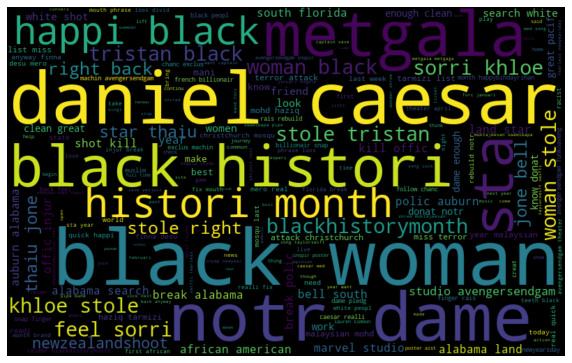

In [79]:
# Wordcloud visualization for precovid df

text_blob_visualization(precovid_cleaned_df)

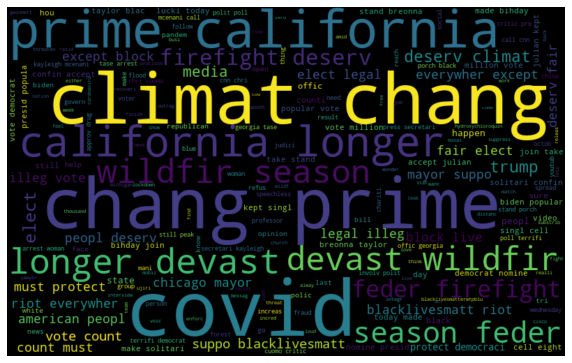

In [80]:
# Wordcloud visualization for covid df

text_blob_visualization(covid_timeline_cleaned_df)

<AxesSubplot:ylabel='followers_count'>

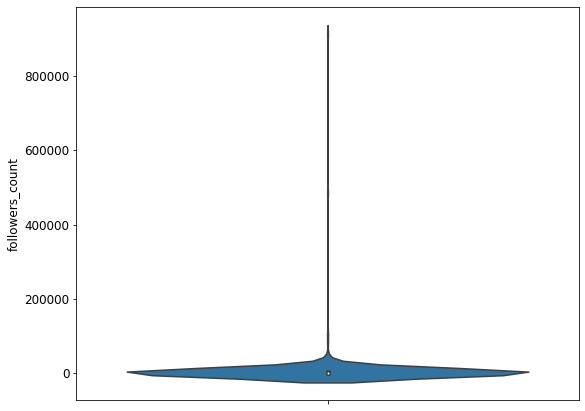

In [81]:
from matplotlib import pyplot

import seaborn as sns

fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot( ax = ax, y = precovid_cleaned_df["followers_count"] ) 

<AxesSubplot:ylabel='followers_count'>

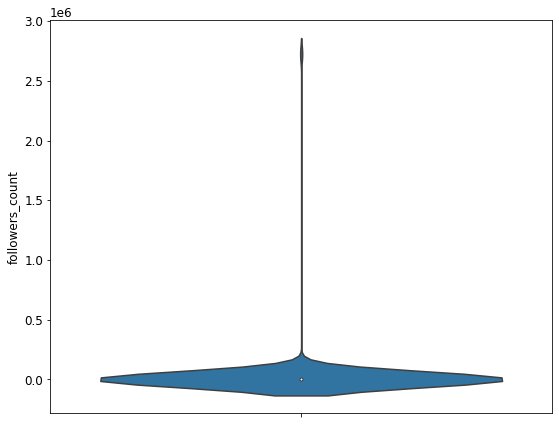

In [82]:
import seaborn as sns

fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot( ax = ax, y = covid_timeline_cleaned_df["followers_count"] ) 

In [83]:
# word2vec embedding visualization

from gensim.models import Word2Vec
import scipy
import nltk
nltk.download('punkt')
import numpy as np

def word2vec_embeddings(df):
    text= ' '.join(df['tweet'])
    sentence=text.split()
    tokens=[nltk.word_tokenize(words) for words in sentence]
    print(len(tokens))
    model = Word2Vec(tokens[:100],size=50,sg=1,min_count=1)
    # Learned vocabulary
    words=list(model.wv.vocab)
    X=model[model.wv.vocab]
    newdf=pd.DataFrame(X)
        
    #Computing the correlation matrix
    X_corr=newdf.corr()

    #Computing eigen values and eigen vectors
    values,vectors=scipy.linalg.eigh(X_corr)

    #Sorting the eigen vectors coresponding to eigen values in descending order
    args = (-values).argsort()
    values = vectors[args]
    vectors = vectors[:, args]

    #Taking first 2 components which explain maximum variance for projecting
    new_vectors=vectors[:,:2]

    #Projecting it onto new dimesion with 2 axis
    neww_X=np.dot(X,new_vectors)
    
    plt.figure(figsize=(13,7))
    plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
    plt.xlabel("PC1",size=15)
    plt.ylabel("PC2",size=15)
    plt.title("Word Embedding Space",size=20)
    vocab=list(model.wv.vocab)
    for i, word in enumerate(vocab):
        plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

[nltk_data] Downloading package punkt to /Users/priyanka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4654


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


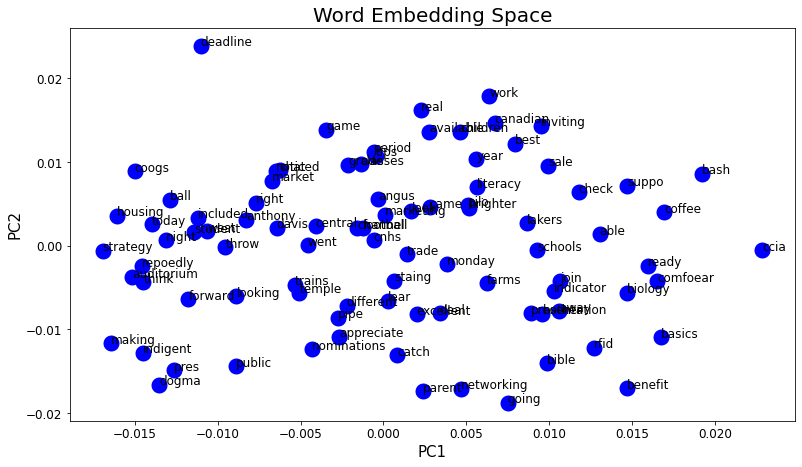

In [84]:
word2vec_embeddings(precovid_cleaned_df)

1796


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


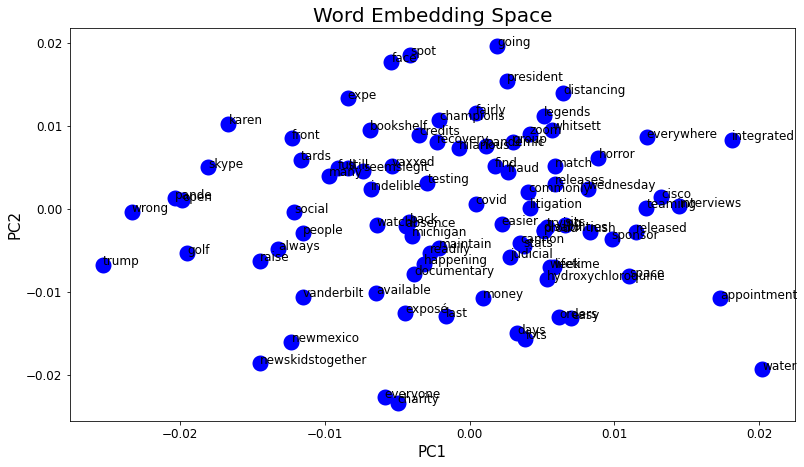

In [85]:
word2vec_embeddings(covid_timeline_cleaned_df)

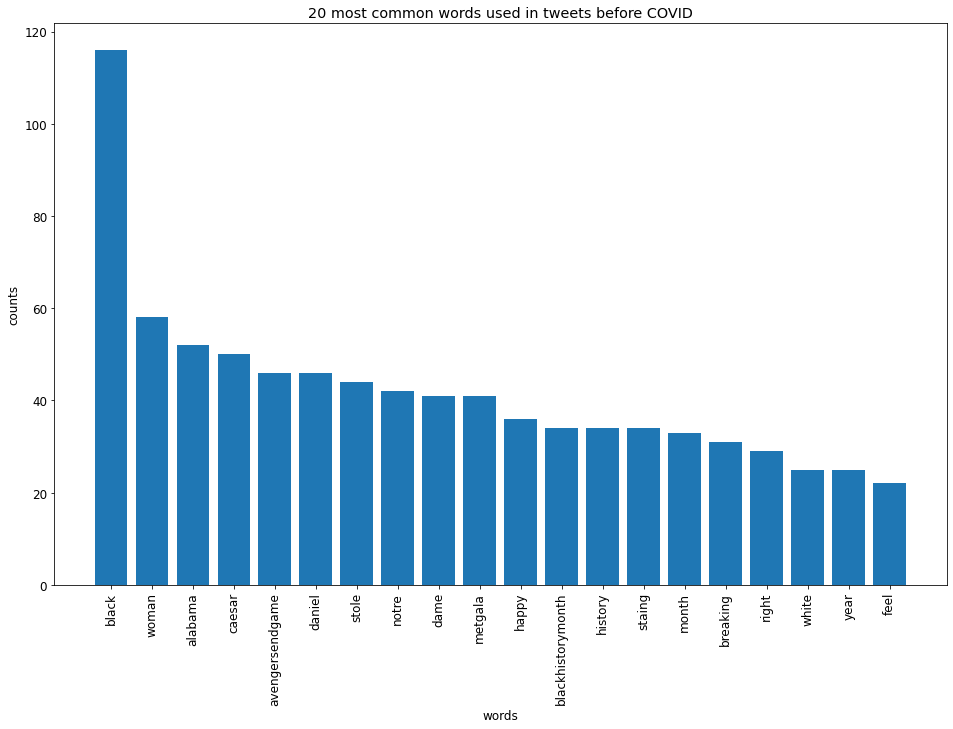

In [90]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer ,plot_title):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    plt.figure(figsize=(16, 10))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title(plot_title)
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed tweets
count_data = count_vectorizer.fit_transform(precovid_cleaned_df['tweet'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer,'20 most common words used in tweets before COVID')

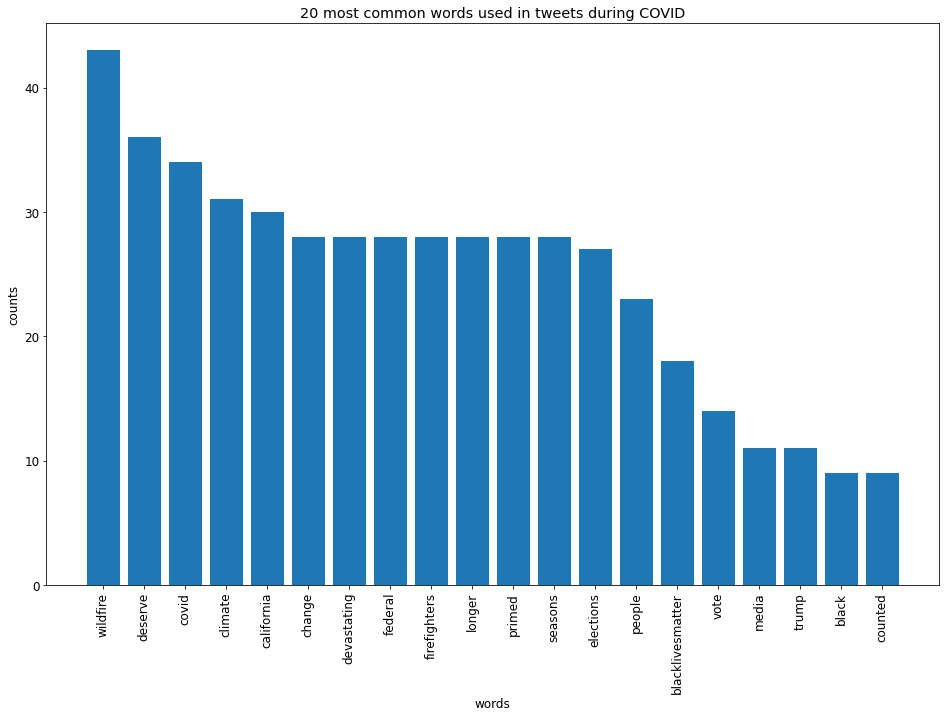

In [91]:
# Fit and transform the processed tweets
count_data = count_vectorizer.fit_transform(covid_timeline_cleaned_df['tweet'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer,'20 most common words used in tweets during COVID')